# Messdaten vom Berg Mauna Loa, Hawaii

Auf dem Berg Mauna Loa, Hawaii, steht eine Messstation.

Unter https://gml.noaa.gov/ccgg/trends/data.html können wir verschiedene Messdaten herunterladen. Du findest einige der dort verfügbaren Daten im Ordner `daten/` - am besten du schaust einmal rein.

## Daten einlesen.

Zunächst importieren wir das Paket `pandas` und vergeben den Alias `pd`:

In [1]:
import pandas as pd

Eine Textdatei im CSV-Format können wir mit `read_csv` einlesen. Wir wollen die Datei "co2_daily_mlo.csv" im Ordner "daten" einlesen.

> Ein Blick in die Datei verrät uns, dass Zeilen, die mit "#" beginnen ignoriert werden können bzw. als Kommentar zu interpretieren sind<br>
> Die Namen der Spalten legen wir mit dem Argument `names` fest.

In [2]:
df = pd.read_csv(
    "daten/co2_daily_mlo.csv",                              # Dateipfad
    comment='#',                                            # alle Zeilen mit # ignorieren
    names=['Jahr', 'Monat', 'Tag', 'Decimal_Datum', 'CO2']  # die Spaltennamen
)

Einen ersten Eindruck über die eingelesenen Daten erhalten wir mit `.head()`

In [3]:
df.head()

,Jahr,Monat,Tag,Decimal_Datum,CO2
0,1974,5,19,1974.3781,333.46
1,1974,5,20,1974.3808,333.64
2,1974,5,21,1974.3836,333.50
3,1974,5,22,1974.3863,333.21
4,1974,5,23,1974.3890,333.05


Das Paket `pandas` stellt uns eine Plotting-Funktion `.plot(...)` zur Verfügung. Sie verwendet im Hintergrund `matplotlib`:

<Axes: title={'center': 'CO2 Konzentration'}, xlabel='Datum', ylabel='CO2 Konzentration'>

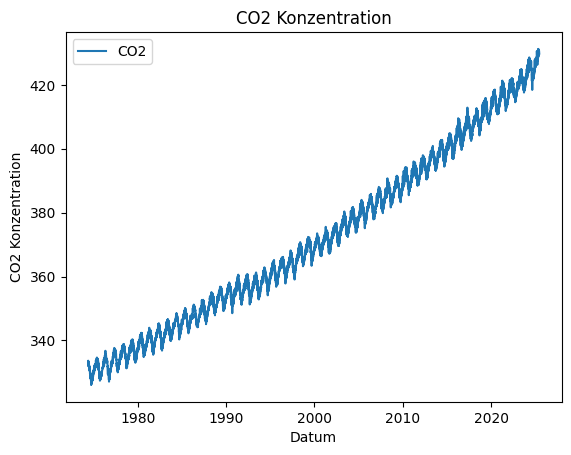

In [4]:
df.plot(x="Decimal_Datum", y="CO2", title="CO2 Konzentration", xlabel="Datum", ylabel="CO2 Konzentration")

<Axes: xlabel='Datum', ylabel='CO2 Konzentration [ppm]'>

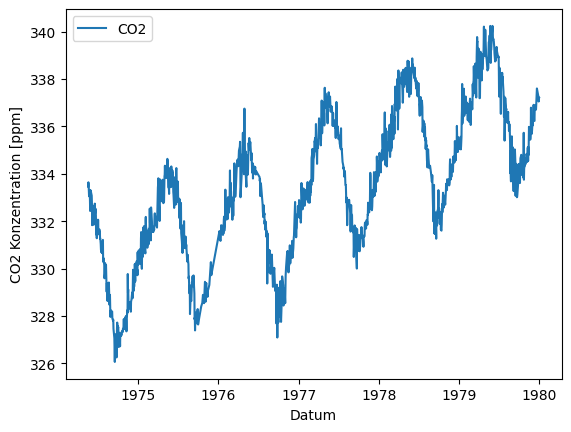

In [5]:
df[df["Decimal_Datum"] < 1980].plot(x="Decimal_Datum", y="CO2", xlabel="Datum", ylabel="CO2 Konzentration [ppm]")

**Aufgabe**
> Schau dir einmal andere Zeiträume an<br>
> Berechne den Mittelwert, das Minimum und das Maximum dieses Zeitraums

## Jahresmittelwerte berechnen

Wenn uns der Verlauf im Detail nicht interessiert, ist eine reduzierte Darstellung gefragt. Zum Beispiel können wir die CO2-Konzentrationen für jedes Jahr berechnen. Dazu können wir den Mittelwert (`mean`) für jedes Jahr (`groupby('Jahr')`) berechen:

<Axes: xlabel='Datum'>

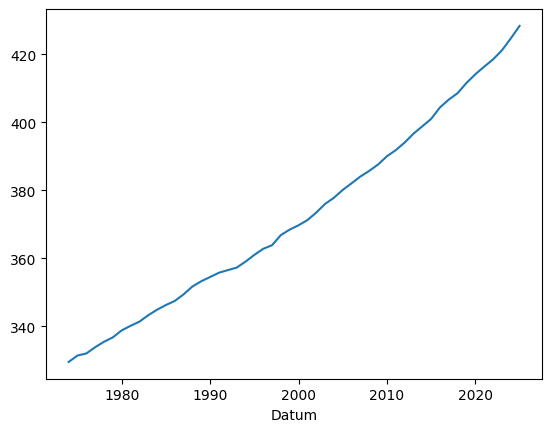

In [6]:
yearly_avg = df.groupby('Jahr')['CO2'].mean()
yearly_avg.plot(x="Jahr", y="CO2", xlabel="Datum")

## Zusatzübung:

Wir können den obigen Graph auch selber mit `matplotlib` erstellen:

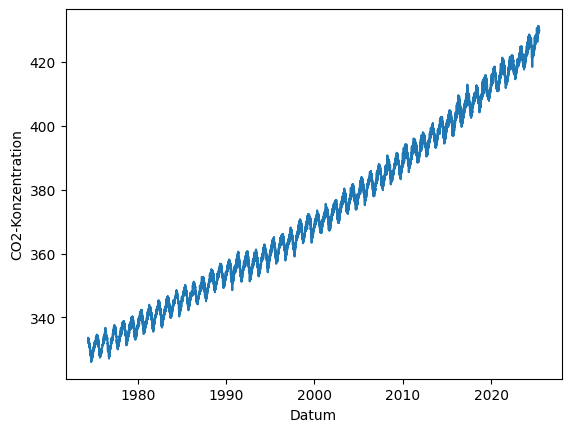

In [7]:
import matplotlib.pyplot as plt

x = df["Decimal_Datum"]
y = df["CO2"]

plt.figure()
plt.plot(x, y)
plt.xlabel("Datum")
plt.ylabel("CO2-Konzentration")
plt.show()